
0: 384x640 1 license-plate, 191.9ms
Speed: 13.1ms preprocess, 191.9ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)
Class prediction: license-plate


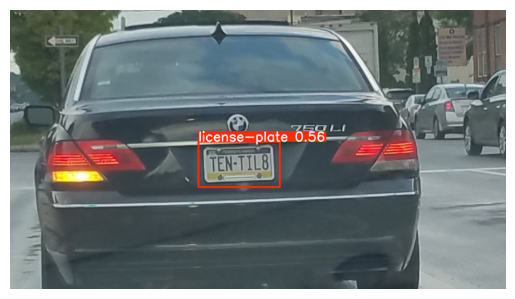

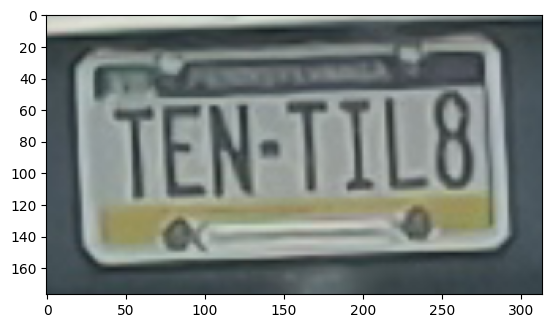

Using CPU. Note: This module is much faster with a GPU.


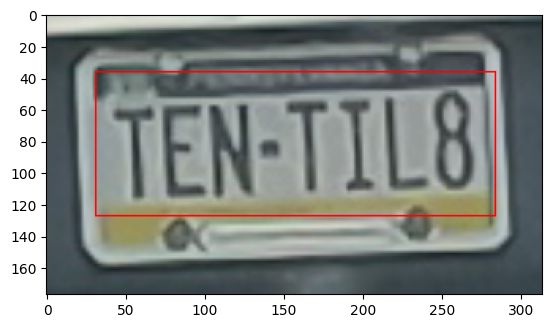

TEN TiLO]


In [15]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import easyocr

mod = YOLO(r"runs\detect\train\weights\best.pt")
path = r"C:\Users\robel\Downloads\car5.png"
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = mod(image)
if isinstance(results, list):
    rendered_img = results[0].plot()
    class_ids = results[0].boxes.cls.cpu().numpy()
    
    for class_id in class_ids:
        class_name = mod.names[int(class_id)]  # Look up class name
        print(f"Class prediction: {class_name}")
else:
    rendered_img = results.plot()

# Display the rendered image
plt.imshow(rendered_img)
plt.axis('off')
plt.show()
for box in results[0].boxes:
    # Get box coordinates (round to integers)
    x1, y1, x2, y2 = (round(x) for x in box.xyxy[0].tolist())

    # Crop the image
    cropped_img = image[y1:y2, x1:x2]

    # Save or display the cropped image 
    plt.imshow(cropped_img)
    plt.show()


def rectangulate(image, top_left, bottom_right):
    image = cv2.rectangle(image, top_left, bottom_right, color=(255,0,0))
    plt.imshow(image)
    plt.show()

reader = easyocr.Reader(['en'], gpu=False)
info = reader.readtext(cropped_img)

for alph_info in info:
    (bbox, text, prob) = alph_info
    (top_left, top_right, bottom_right, bottom_left) = bbox
    rectangulate(cropped_img, top_left, bottom_right)
    print(text)